<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/Stock_NeurIPS2018_SB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
import os

from stable_baselines3 import (
    PPO,
    TD3,
    SAC,
    A2C,
    DDPG
)
from Processed import get_processed_data
from module import helper
from module.yahoodownloader import YahooDownloader
from module.env_stocktrading import StockTradingEnv
from module.models import DRLAgent
from module.config import (
    INDICATORS,
    env_kwargs,
    A2C_PARAMS,
    PPO_PARAMS,
    SAC_PARAMS,
    DDPG_PARAMS,
    TD3_PARAMS,
    TRADE_START_DATE,
    TRADE_END_DATE
)
from module.config_tickers import (
    DOW_30_TICKER
)

mvo_df, train, trade, df = get_processed_data(
    ticker=DOW_30_TICKER, indicators=INDICATORS)

fst = mvo_df
fst = fst.iloc[0*29:0*29+29, :]
tic = fst['tic'].tolist()

mvo = pd.DataFrame()

for k in range(len(tic)):
    mvo[tic[k]] = 0

for i in range(mvo_df.shape[0]//29):
    n = mvo_df
    n = n.iloc[i*29:i*29+29, :]
    date = n['date'][i*29]
    mvo.loc[date] = n['close'].tolist()

e_trade_gym = StockTradingEnv(
    df=trade, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

========== DOWNLOADING ==========
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


hit end!
Annual return          0.104186
Cumulative returns     0.326282
Annual volatility      0.185120
Sharpe ratio           0.628893
Calmar ratio           0.521179
Stability              0.404863
Max drawdown          -0.199904
Omega ratio            1.112729
Sortino ratio          0.886778
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.036883
Daily value at risk   -0.022861
dtype: float64
hit end!
Annual return          0.118825
Cumulative returns     0.376999
Annual volatility      0.187593
Sharpe ratio           0.693320
Calmar ratio           0.513689
Stability              0.393700
Max drawdown          -0.231317
Omega ratio            1.123931
Sortino ratio          0.983587
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.008468
Daily value at risk   -0.023118
dtype: float64
hit end!
Annual return          0.068424
Cumulative returns     0.207525
Annual volatility      0.164560
Sharpe ratio   

<Figure size 2000x1500 with 0 Axes>

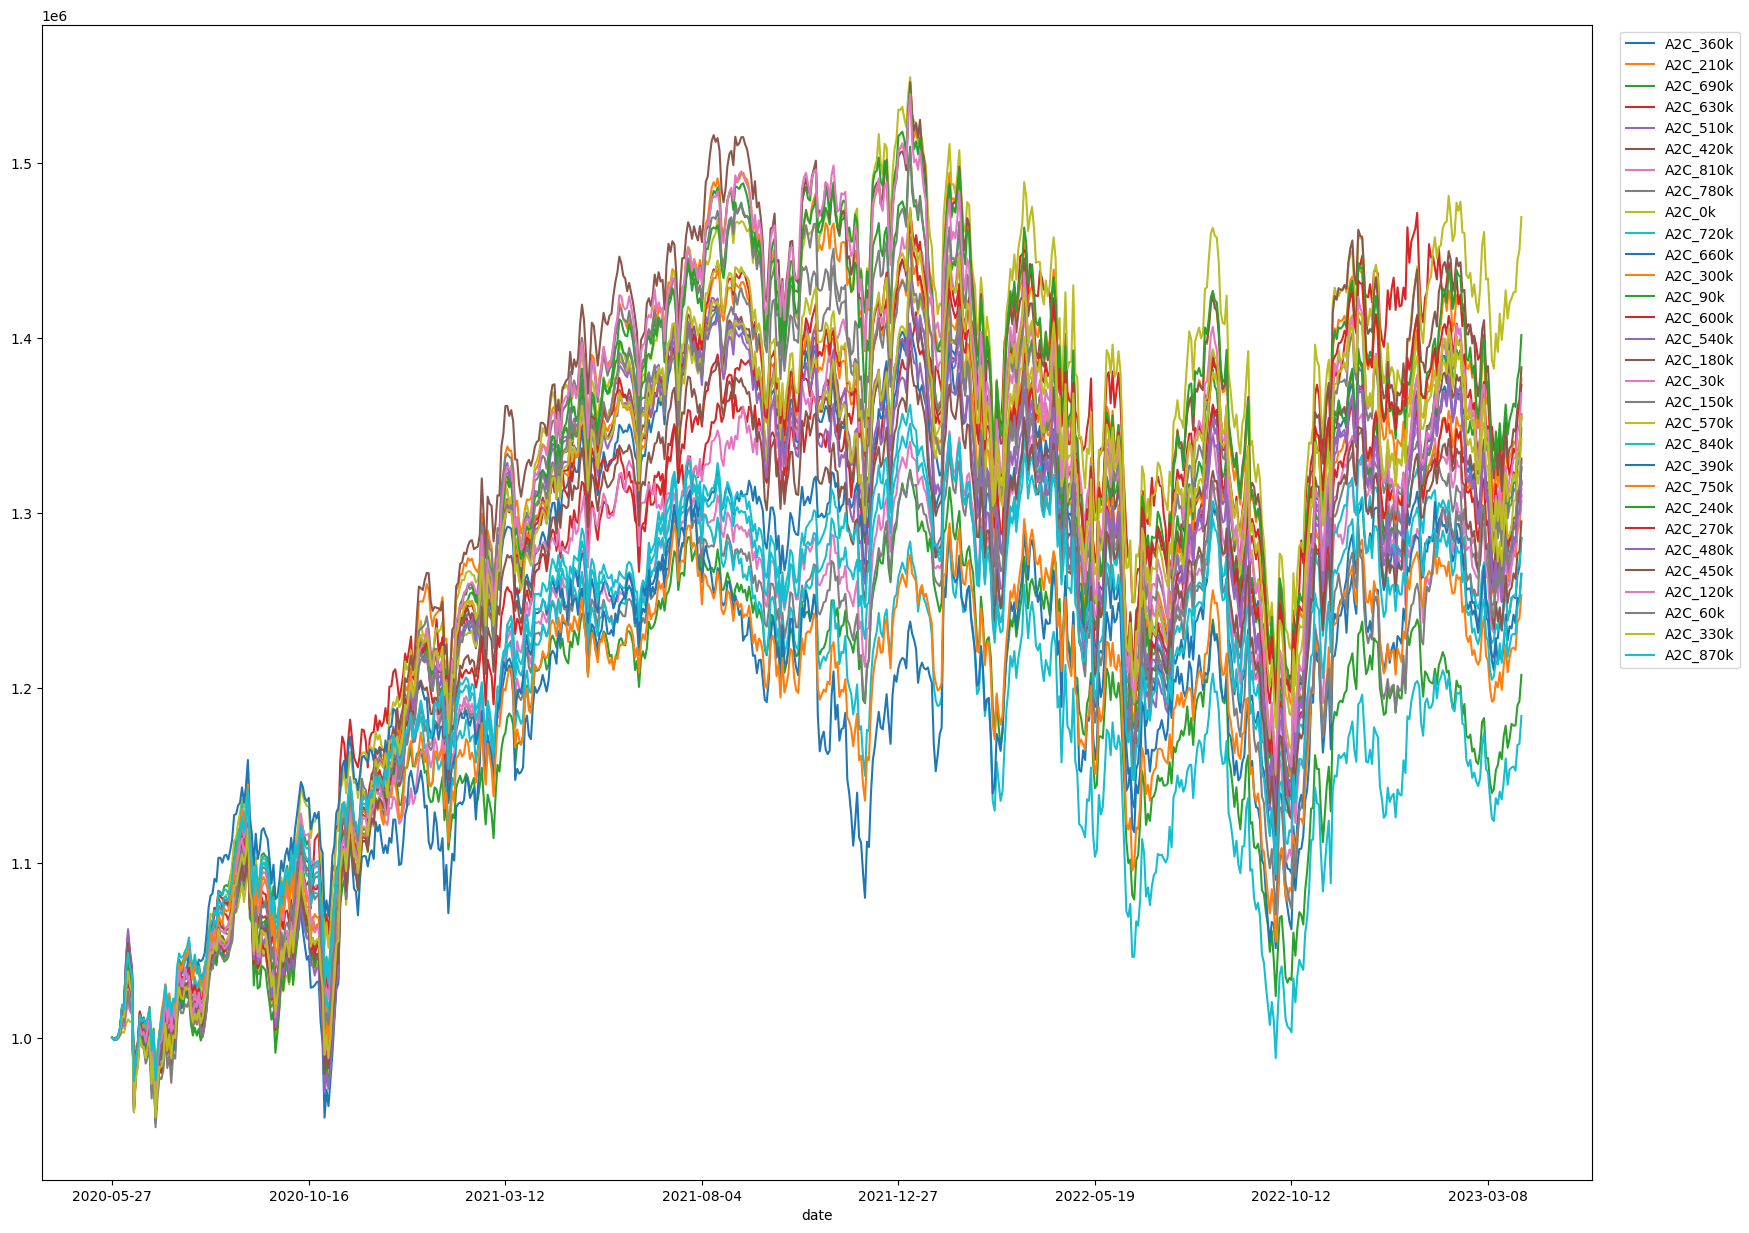

In [9]:
d = {}
c = 0
l = []
now=datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

for mod in os.listdir('trained_models/A2C'):
    
    c += 1
    df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
        model=A2C.load(path = "trained_models/A2C/" + mod, kwargs=A2C_PARAMS),
        environment=e_trade_gym)

    df_result_a2c = df_account_value_a2c.set_index(
        df_account_value_a2c.columns[0])
    
    if c > 1:
        result=pd.merge(df_result_a2c_2, df_result_a2c,left_index = True, right_index = True)
        df_result_a2c_2 = result
    
    else:
        df_result_a2c_2 = df_result_a2c
    
    perf_stats_a2c=helper.backtest_stats(
        account_value = df_account_value_a2c)
    perf_stats_a2c=pd.DataFrame(perf_stats_a2c)

    Annual_return_a2c=perf_stats_a2c.T['Annual return'][0]

    d[mod[:-4]] = Annual_return_a2c  

    l.append(mod[:-4])

result.columns = l

plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["legend.loc"] = 'upper right'
plt.figure()
result.plot().legend(bbox_to_anchor = (1.1, 1))
plt.savefig("trained_models/models_A2C" + ".jpg")

best_model_a2c = max(d.items(), key=lambda i: i[1])

hit end!
Annual return          0.153899
Cumulative returns     0.503589
Annual volatility      0.175430
Sharpe ratio           0.904829
Calmar ratio           0.965008
Stability              0.875326
Max drawdown          -0.159480
Omega ratio            1.163970
Sortino ratio          1.338951
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.020233
Daily value at risk   -0.021472
dtype: float64
hit end!
Annual return          0.167737
Cumulative returns     0.555536
Annual volatility      0.180947
Sharpe ratio           0.948730
Calmar ratio           1.051942
Stability              0.853022
Max drawdown          -0.159455
Omega ratio            1.170500
Sortino ratio          1.394983
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.031494
Daily value at risk   -0.022116
dtype: float64
hit end!
Annual return          0.131467
Cumulative returns     0.421793
Annual volatility      0.160193
Sharpe ratio   

<Figure size 2000x1500 with 0 Axes>

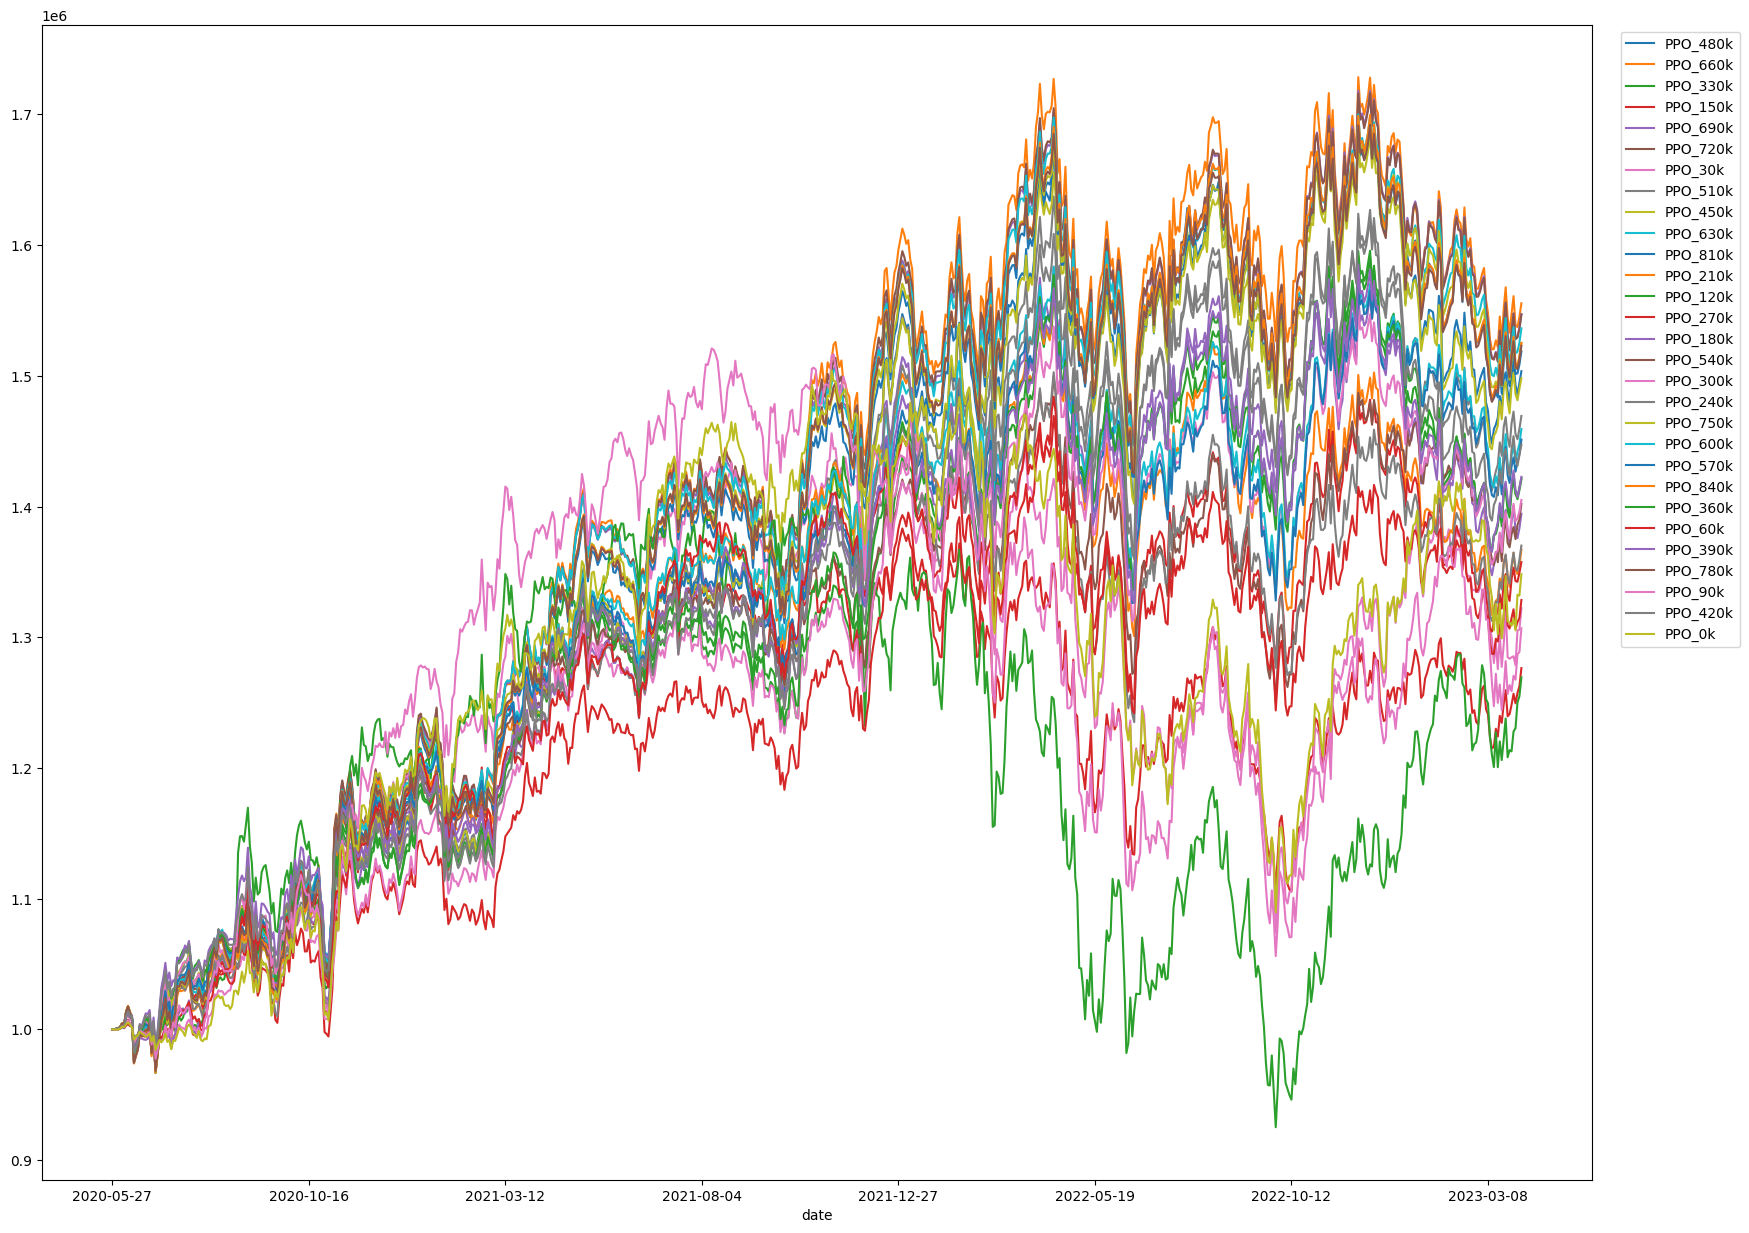

In [10]:
d = {}
c = 0
l = []
for mod in os.listdir('trained_models/PPO'):
    
    c += 1
    df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
        model=PPO.load(path = "trained_models/PPO/" + mod, kwargs=PPO_PARAMS),
        environment=e_trade_gym)

    df_result_ppo = df_account_value_ppo.set_index(
        df_account_value_ppo.columns[0])
    
    if c > 1:
        result=pd.merge(df_result_ppo_2, df_result_ppo,left_index = True, right_index = True)
        df_result_ppo_2 = result
    
    else:
        df_result_ppo_2 = df_result_ppo
    
    perf_stats_ppo=helper.backtest_stats(
        account_value = df_account_value_ppo)
    perf_stats_ppo=pd.DataFrame(perf_stats_ppo)

    Annual_return_ppo=perf_stats_ppo.T['Annual return'][0]

    d[mod[:-4]] = Annual_return_ppo  

    l.append(mod[:-4])

result.columns = l

plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["legend.loc"] = 'upper right'
plt.figure()
result.plot().legend(bbox_to_anchor = (1.1, 1))
plt.savefig("trained_models/models_PPO" + ".jpg")
best_model_ppo = max(d.items(), key=lambda i: i[1])

day: 717, episode: 180
begin_total_asset: 1000000.00
end_total_asset: 1300276.34
total_reward: 300276.34
total_cost: 1042.83
total_trades: 10599
Sharpe: 0.635
hit end!
Annual return          0.096538
Cumulative returns     0.300276
Annual volatility      0.167625
Sharpe ratio           0.634679
Calmar ratio           0.464617
Stability              0.412423
Max drawdown          -0.207780
Omega ratio            1.114406
Sortino ratio          0.882488
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.979691
Daily value at risk   -0.020697
dtype: float64
hit end!
Annual return          0.104090
Cumulative returns     0.325955
Annual volatility      0.173500
Sharpe ratio           0.658606
Calmar ratio           0.483476
Stability              0.406675
Max drawdown          -0.215295
Omega ratio            1.118919
Sortino ratio          0.917143
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.980830
Daily va

<Figure size 2000x1500 with 0 Axes>

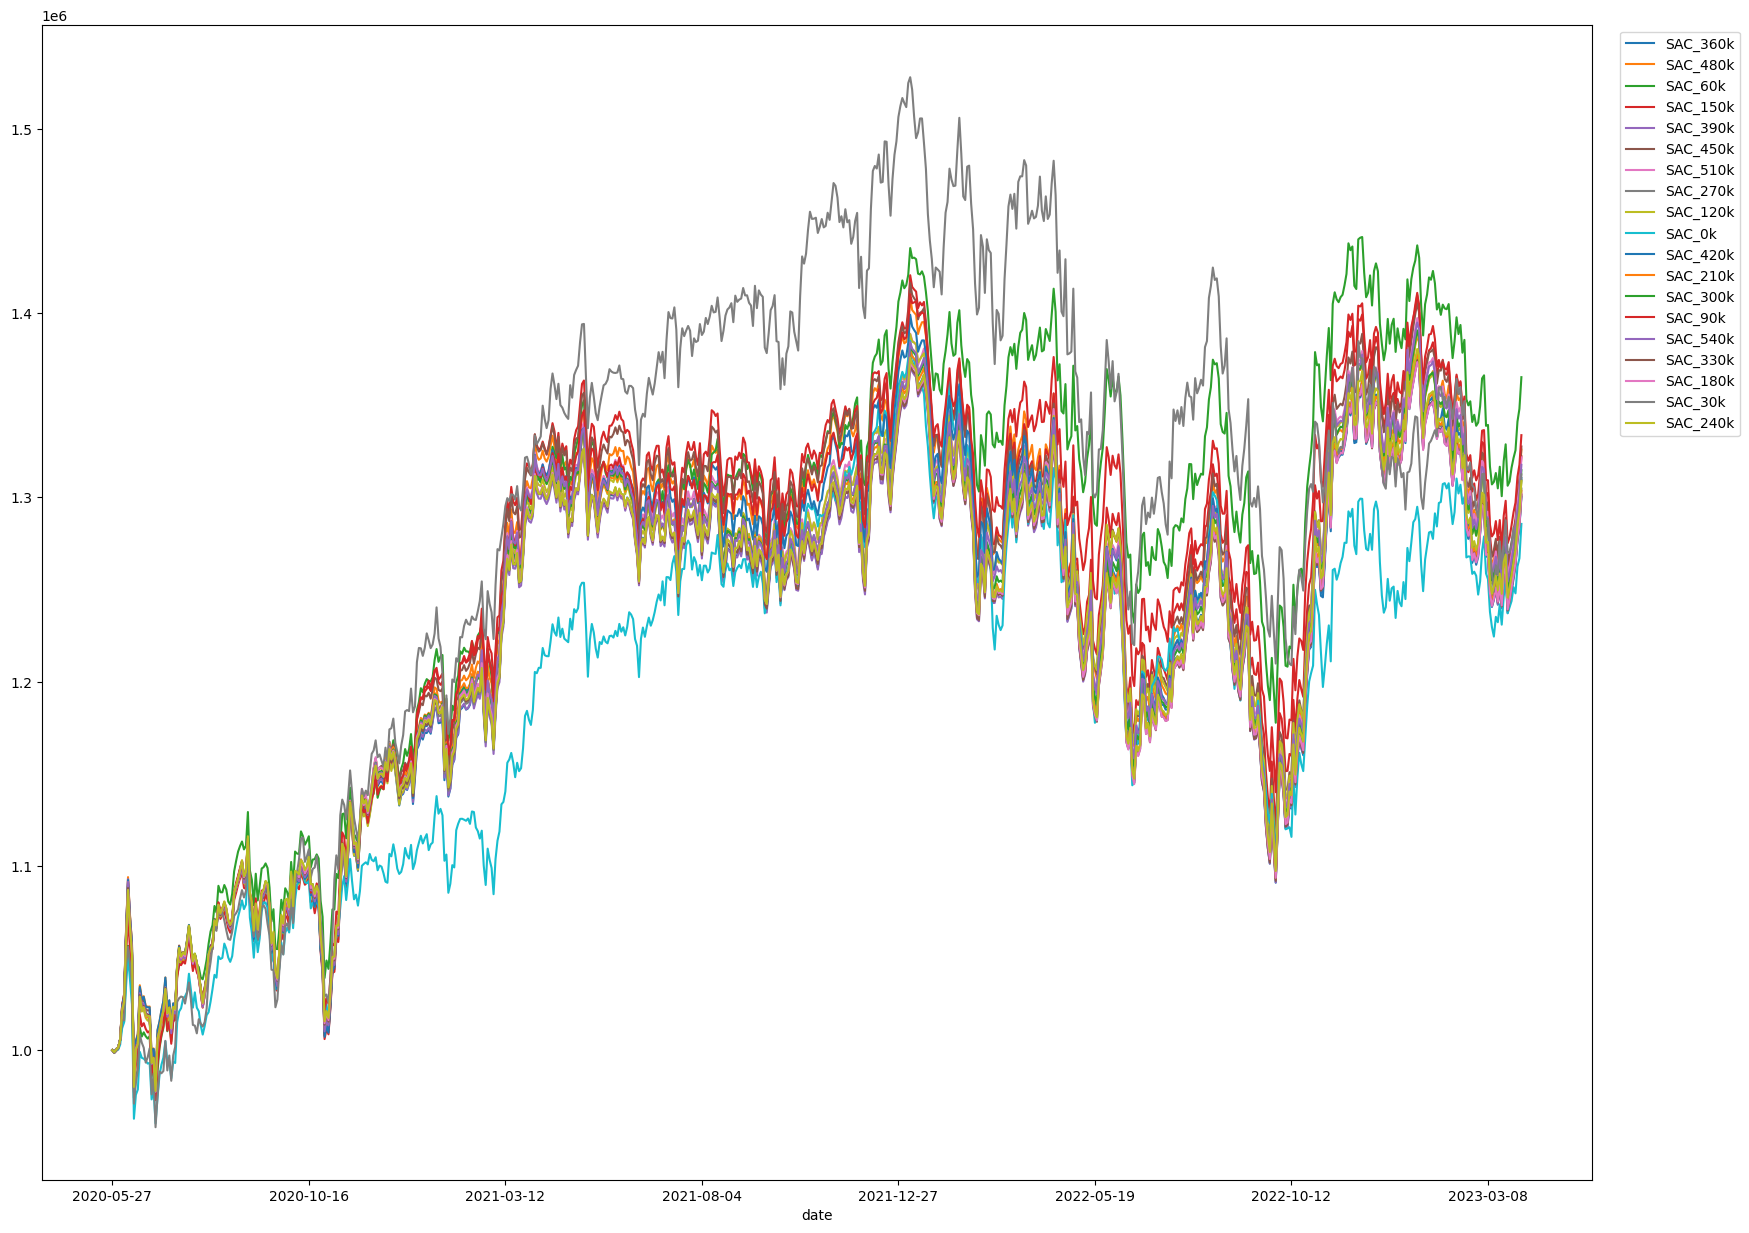

In [11]:
d = {}
c = 0
l = []
for mod in os.listdir('trained_models/SAC'):
    
    c += 1
    df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
        model=SAC.load(path = "trained_models/SAC/" + mod, kwargs=SAC_PARAMS),
        environment=e_trade_gym)

    df_result_sac = df_account_value_sac.set_index(
        df_account_value_sac.columns[0])
    
    if c > 1:
        result=pd.merge(df_result_sac_2, df_result_sac,left_index = True, right_index = True)
        df_result_sac_2 = result
    
    else:
        df_result_sac_2 = df_result_sac
    
    perf_stats_sac=helper.backtest_stats(
        account_value = df_account_value_sac)
    perf_stats_sac=pd.DataFrame(perf_stats_sac)

    Annual_return_sac=perf_stats_sac.T['Annual return'][0]

    d[mod[:-4]] = Annual_return_sac  

    l.append(mod[:-4])

result.columns = l

plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["legend.loc"] = 'upper right'
plt.figure()
result.plot().legend(bbox_to_anchor = (1.1, 1))
plt.savefig("trained_models/models_SAC" + ".jpg")
best_model_sac = max(d.items(), key=lambda i: i[1])

hit end!
Annual return          0.119244
Cumulative returns     0.378467
Annual volatility      0.189790
Sharpe ratio           0.689554
Calmar ratio           0.482488
Stability              0.252989
Max drawdown          -0.247143
Omega ratio            1.124150
Sortino ratio          0.975178
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.008680
Daily value at risk   -0.023392
dtype: float64
day: 717, episode: 240
begin_total_asset: 1000000.00
end_total_asset: 1378467.42
total_reward: 378467.42
total_cost: 1256.11
total_trades: 12915
Sharpe: 0.690
hit end!
Annual return          0.119244
Cumulative returns     0.378467
Annual volatility      0.189790
Sharpe ratio           0.689554
Calmar ratio           0.482488
Stability              0.252989
Max drawdown          -0.247143
Omega ratio            1.124150
Sortino ratio          0.975178
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.008680
Daily va

<Figure size 2000x1500 with 0 Axes>

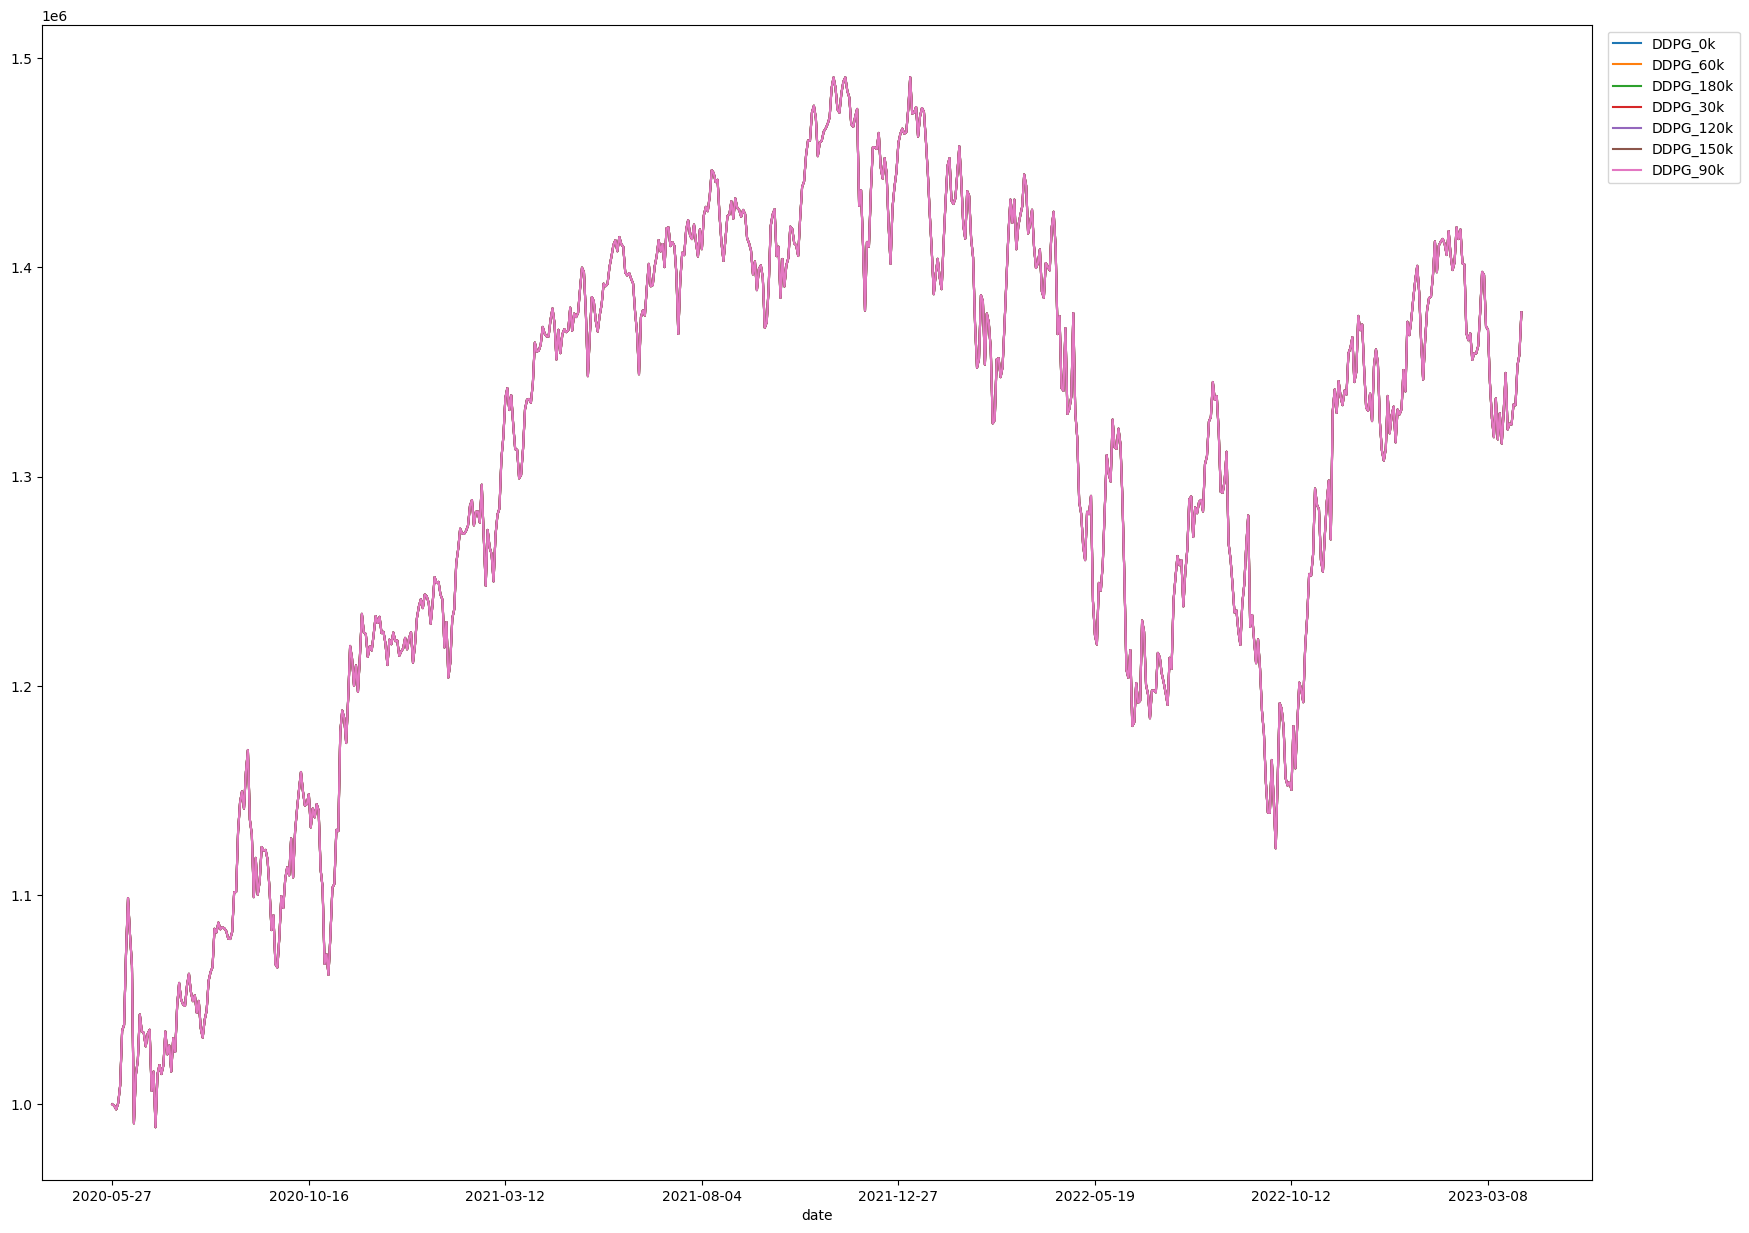

In [12]:
d = {}
c = 0
l = []
for mod in os.listdir('trained_models/DDPG'):
    
    c += 1
    df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
        model=DDPG.load(path = "trained_models/DDPG/" + mod, kwargs=DDPG_PARAMS),
        environment=e_trade_gym)

    df_result_ddpg = df_account_value_ddpg.set_index(
        df_account_value_ddpg.columns[0])
    
    if c > 1:
        result=pd.merge(df_result_ddpg_2, df_result_ddpg,left_index = True, right_index = True)
        df_result_ddpg_2 = result
    
    else:
        df_result_ddpg_2 = df_result_ddpg
    
    perf_stats_ddpg=helper.backtest_stats(
        account_value = df_account_value_ddpg)
    perf_stats_ddpg=pd.DataFrame(perf_stats_ddpg)

    Annual_return_ddpg=perf_stats_ddpg.T['Annual return'][0]

    d[mod[:-4]] = Annual_return_ddpg  

    l.append(mod[:-4])

result.columns = l

plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["legend.loc"] = 'upper right'
plt.figure()
result.plot().legend(bbox_to_anchor = (1.1, 1))
plt.savefig("trained_models/models_DDPG" + ".jpg")
best_model_ddpg = max(d.items(), key=lambda i: i[1])

In [13]:
best_model = max(best_model_a2c, best_model_ddpg, best_model_ppo, best_model_sac, key=lambda i: i[1])
best_model

('PPO_660k', 0.16773723533158846)

hit end!
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- I: No timezone found, symbol may be delisted
Shape of DataFrame:  (1434, 8)
Annual return          0.085430
Cumulative returns     0.594378
Annual volatility      9.289023
Sharpe ratio           4.147115
Calmar ratio           0.132484
Stability              0.011198
Max drawdown          -0.644830
Omega ratio            1.779422
Sortino ratio          8.394585
Skew                        NaN
Kurtosis                    NaN
Tail ratio             2.053830
Daily value at risk   -1.017439
dtype: float64
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^: No timezone found, symbol

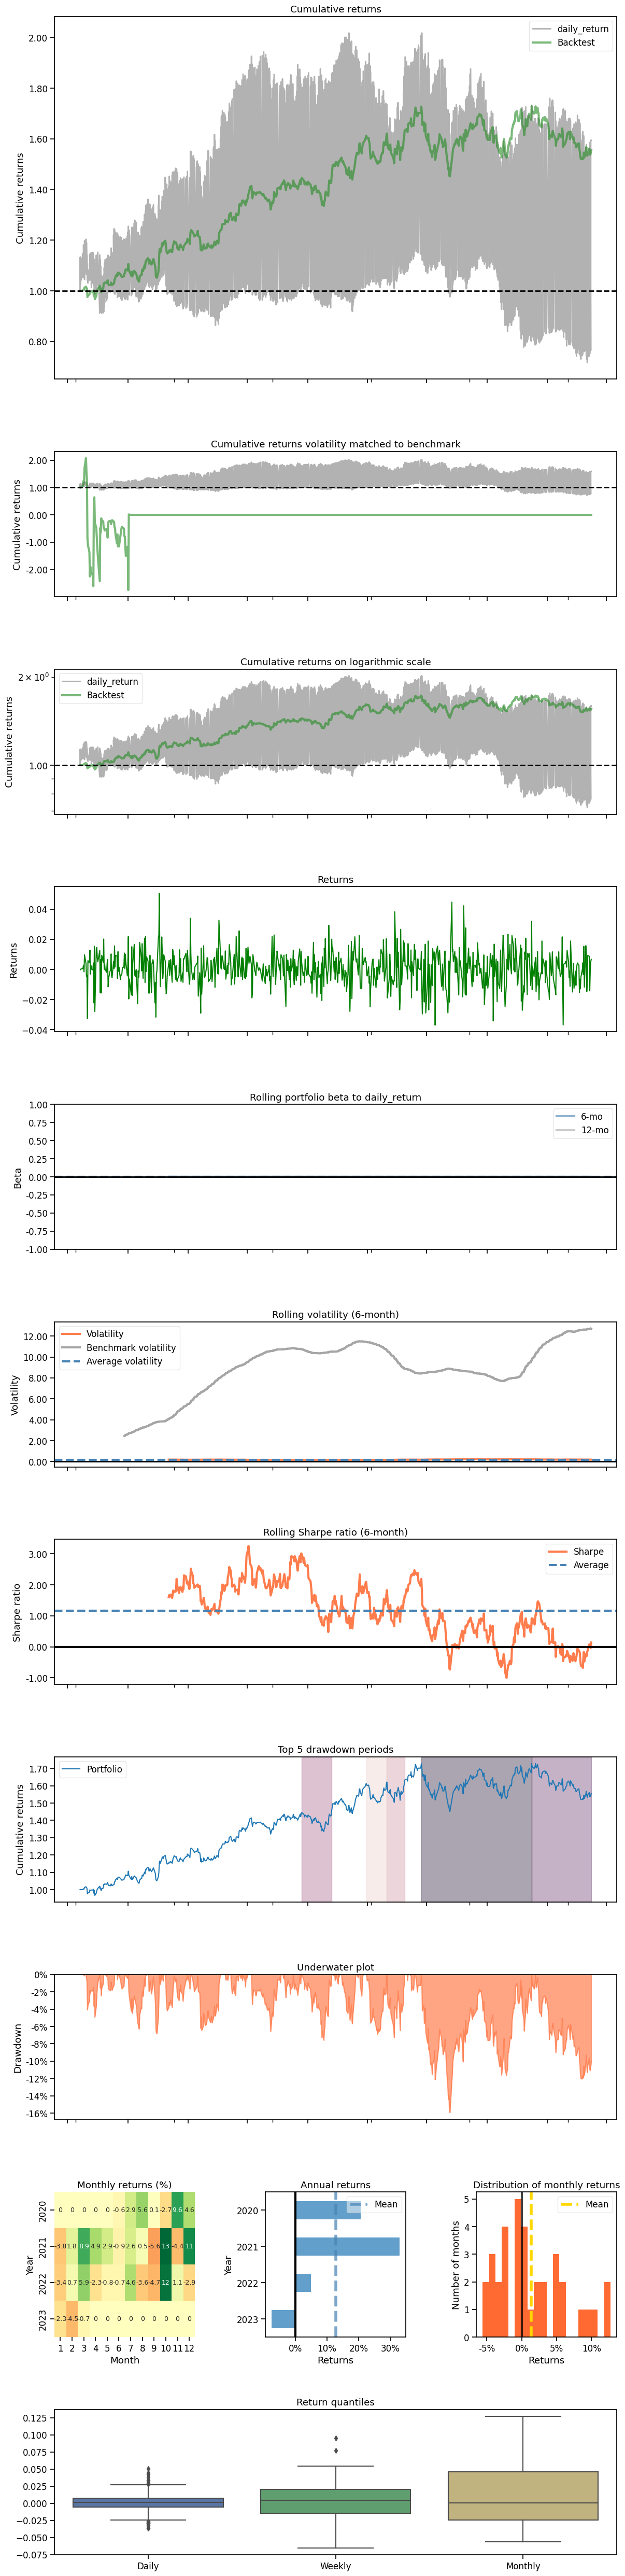

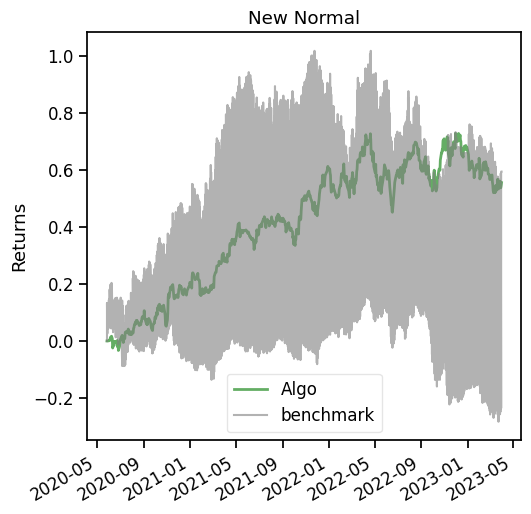

In [14]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
        model=PPO.load(path = "trained_models/PPO/" + best_model[0] + '.zip', kwargs=PPO_PARAMS),
        environment=e_trade_gym)

baseline_df = helper.get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats=helper.backtest_stats(baseline_df, value_col_name = 'close')

helper.backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])